In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction

# Load in the necessary data

## The model results summaries

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
selected_feat_dir = os.path.join(datadir, 'p_models', 'selected_features_constHP')
results_df = pd.read_csv(os.path.join(selected_feat_dir, 'all.stat.results.csv'))
results_allfeats_df = pd.read_csv(os.path.join(datadir, 'p_models','all_features_constHP', 'all.stat.results.csv'))

In [3]:
results_df.head()

,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.907,0.173,0.896,0.183,0.862,0.221,YHB,P
1,0.817,0.241,0.766,0.274,-3.866,1.079,YDC,P
2,0.918,0.164,0.911,0.173,0.916,0.172,YWB,P
3,0.904,0.173,0.903,0.178,0.860,0.206,MCID,P
4,0.901,0.176,0.887,0.187,0.884,0.203,YHL,P


## The example counts

In [4]:
## READ IN DF FOR COUNTS ##
split_cnts = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.station.ex.counts.csv'))
df_2023 = pd.read_csv(os.path.join(datadir, 'feature_splits', 'p.20230101.csv'))
split_cnts.head()

,station,cnt_train,cnt_test,cnt_holdout
0,YHH,4813,1215.0,397.0
1,YNR,4649,1174.0,275.0
2,YMC,4322,1110.0,460.0
3,YMR,4154,1071.0,446.0
4,YPM,4078,1018.0,438.0


## The model predictions

In [5]:
all_stats = results_df['station']
train_preds_df = combine_prediction_files(all_stats, selected_feat_dir,'P', 'train')
test_preds_df = combine_prediction_files(all_stats, selected_feat_dir,'P', 'test')
train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.745854,YHB
1,60001352,2.250510,2.051306,YHB
2,60001367,2.155231,2.064458,YHB
3,60001392,2.076413,1.429495,YHB
4,60001397,2.273901,2.054309,YHB
...,...,...,...,...
588,60456897,2.121661,2.361038,YDD
589,60456907,3.098341,3.198689,YDD
590,60470442,1.697778,1.462730,YDD
591,60513762,1.051296,0.868705,YDD


In [6]:
holdout_preds_df = combine_prediction_files(df_2023['station'].unique(), selected_feat_dir,'P', 'holdout')
holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60528982,1.363650,1.169807,YHH
1,60529052,1.338398,1.049498,YHH
2,60529182,2.608960,2.289284,YHH
3,60529562,0.843194,0.737601,YHH
4,60529752,1.289612,1.283531,YHH
...,...,...,...,...
14,60554577,1.558406,1.837201,FLWY
15,60556087,1.402305,1.234699,FLWY
16,60556132,1.403297,1.871400,FLWY
17,60556617,1.858090,1.679217,FLWY


In [7]:
(holdout_preds_df[holdout_preds_df['station'] == 'YDC']['magnitude'] - holdout_preds_df[holdout_preds_df['station'] == 'YDC']['predicted_magnitude'] ).sort_values()

10   -0.218203
0     0.006885
6     0.301074
7     0.538695
2     0.567255
22    0.727450
17    0.781628
1     0.812349
14    0.814657
8     0.830212
23    0.859177
19    0.863453
24    0.943471
18    1.017947
15    1.059425
12    1.129432
20    1.163924
5     1.168135
13    1.177512
28    1.250964
3     1.260301
4     1.302012
21    1.342837
25    1.387876
26    1.428724
9     1.461138
11    1.461293
16    1.507641
27    1.660346
dtype: float64

In [8]:
(holdout_preds_df[holdout_preds_df['station'] == 'YNM']['magnitude'] - holdout_preds_df[holdout_preds_df['station'] == 'YNM']['predicted_magnitude'] ).sort_values()

5   -0.181802
0   -0.098086
4   -0.057159
2   -0.032686
3    0.030301
7    0.058439
1    0.124251
6    0.166219
dtype: float64

In [9]:
# Filter split counts to only stats with models
split_cnts = split_cnts[split_cnts['station'].isin(all_stats)]

# Look at the scores from various splits

In [10]:
results_df['train_r2'].describe()

count    35.000000
mean      0.905200
std       0.027321
min       0.817000
25%       0.894500
50%       0.909000
75%       0.922500
max       0.954000
Name: train_r2, dtype: float64

In [11]:
results_df['test_r2'].describe()

count    35.000000
mean      0.886257
std       0.034452
min       0.766000
25%       0.873500
50%       0.887000
75%       0.909500
max       0.934000
Name: test_r2, dtype: float64

In [12]:
results_df['holdout_r2'].describe()

count    29.000000
mean      0.650621
std       0.871890
min      -3.866000
25%       0.762000
50%       0.822000
75%       0.862000
max       0.916000
Name: holdout_r2, dtype: float64

In [13]:
(test_preds_df['magnitude'] - test_preds_df['predicted_magnitude']).describe()

count    16531.000000
mean         0.013877
std          0.193022
min         -1.503652
25%         -0.104603
50%          0.009775
75%          0.127291
max          1.477808
dtype: float64

In [14]:
(holdout_preds_df['magnitude'] - holdout_preds_df['predicted_magnitude']).describe()

count    5861.000000
mean        0.013624
std         0.235828
min        -1.112784
25%        -0.131455
50%         0.013661
75%         0.156011
max         1.660346
dtype: float64

In [15]:
from sklearn.metrics import r2_score

In [16]:
(holdout_preds_df['magnitude'] - holdout_preds_df['predicted_magnitude'])

0     0.193843
1     0.288900
2     0.319676
3     0.105593
4     0.006081
        ...   
14   -0.278795
15    0.167606
16   -0.468103
17    0.178873
18   -0.078796
Length: 5861, dtype: float64

# Make tables/heatmaps to compare the scores

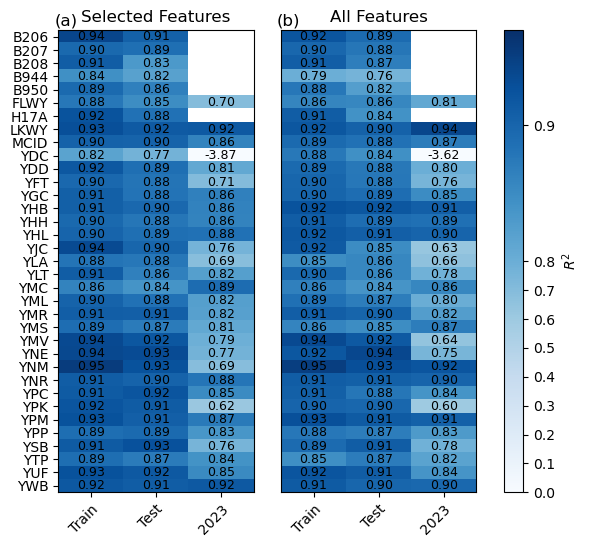

In [17]:
fig, axes = plt.subplots(1, 3, width_ratios=[2, 2, 0.2], figsize=(6, 6))

midpoint_normalize = True
midpoint = 0.8
cmap_min = 0
cmap_max = 0.97
xlabels=['Train', 'Test', '2023']

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Selected Features',
                        ax=axes[0],
                        show_ylabels=True,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
im2 = plotting.scores_heatmap(results_allfeats_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='All Features',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
plt.colorbar(im2, cax=axes[2], label=f'$R^2$', ticks=np.arange(0, 1.0, 0.1))

sp_labels = ['(a)', '(b)']
for i, ax in enumerate(axes[:-1]):
    ax.text(-0.02, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    
#fig.tight_layout()
fig.show()

cmap midpoint set to 397.0
cmap min set to 8.0
cmap max set to 4813.0
cmap min set to -0.25
cmap max set to 0.14500000000000002


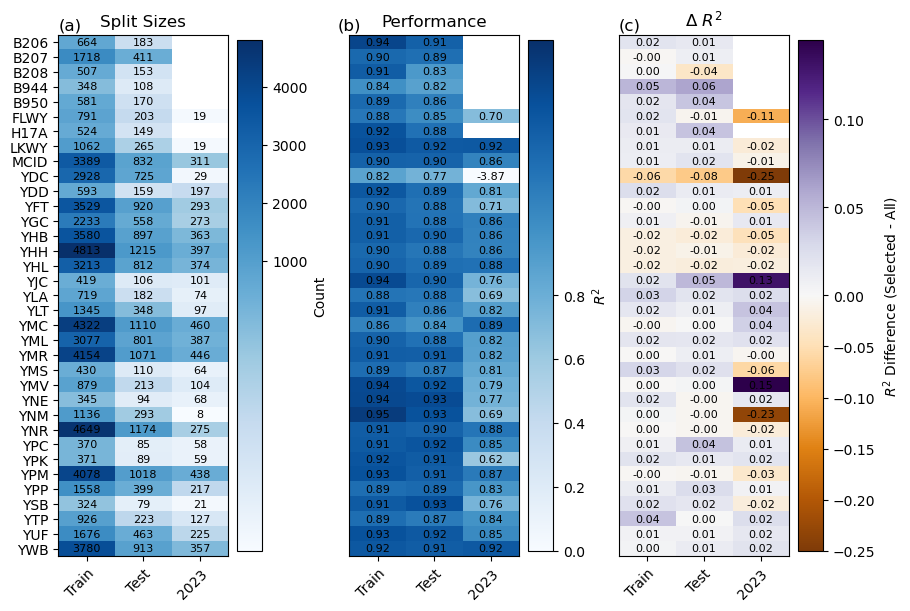

In [18]:
diff_df = results_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']] - results_allfeats_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']]
diff_df['station'] = results_df.sort_values('station')['station']
fig, axes = plt.subplots(1, 3, figsize=(9, 6), constrained_layout=True) #, width_ratios=[2, 2, 0.2], figsize=(6, 6))

im1 = plotting.scores_heatmap(split_cnts.sort_values('station'),
                        ax=axes[0],
                        cols=['cnt_train', 'cnt_test', 'cnt_holdout'],
                        midpoint_normalize=True,
                        midpoint=None,
                        title='Split Sizes',
                        show_ylabels=True,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'Count',
                        cmap=cm.Blues,
                        tablefontcolor='k',
                        tablefontsize=8,
                        tight_layout=True,
                        tablevalueprec=0)

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Performance',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=True,
                        xticklabels=xlabels,
                        tablefontsize=8,
                        cbar_label=f'$R^2$')

im3 = plotting.scores_heatmap(diff_df,
                             ax = axes[2],
                            midpoint_normalize=True,
                            midpoint=0,
                            cmap_max = None,
                            cmap_min = None,
                            title='$\Delta$ $R^2$',
                            show_ylabels=False,
                            show_cbar=True,
                            xticklabels=xlabels,
                            cbar_label=f'$R^2$ Difference (Selected - All)',
                            cmap=cm.PuOr,
                            tablefontcolor='k',
                            tablefontsize=8,
                            tight_layout=True,
                            )

sp_labels = ['(a)', '(b)', '(c)']
sp_label_x = [ 0,-0.07, 0]
for i, ax in enumerate(axes):
    ax.text(sp_label_x[i], 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    
#fig.tight_layout()

In [41]:
diff_df[['train_r2', 'test_r2', 'holdout_r2']].quantile()

train_r2      0.010
test_r2       0.008
holdout_r2    0.005
Name: 0.5, dtype: float64

In [42]:
diff_df[['train_r2', 'test_r2', 'holdout_r2']].describe()

,train_r2,test_r2,holdout_r2
count,35.000000,35.000000,29.000000
mean,0.008600,0.007286,-0.012759
std,0.018989,0.025264,0.080137
min,-0.058000,-0.078000,-0.250000
25%,0.000000,-0.004500,-0.024000
50%,0.010000,0.008000,0.005000
75%,0.019000,0.017500,0.020000
max,0.050000,0.061000,0.145000


# Actual vs predicted plots

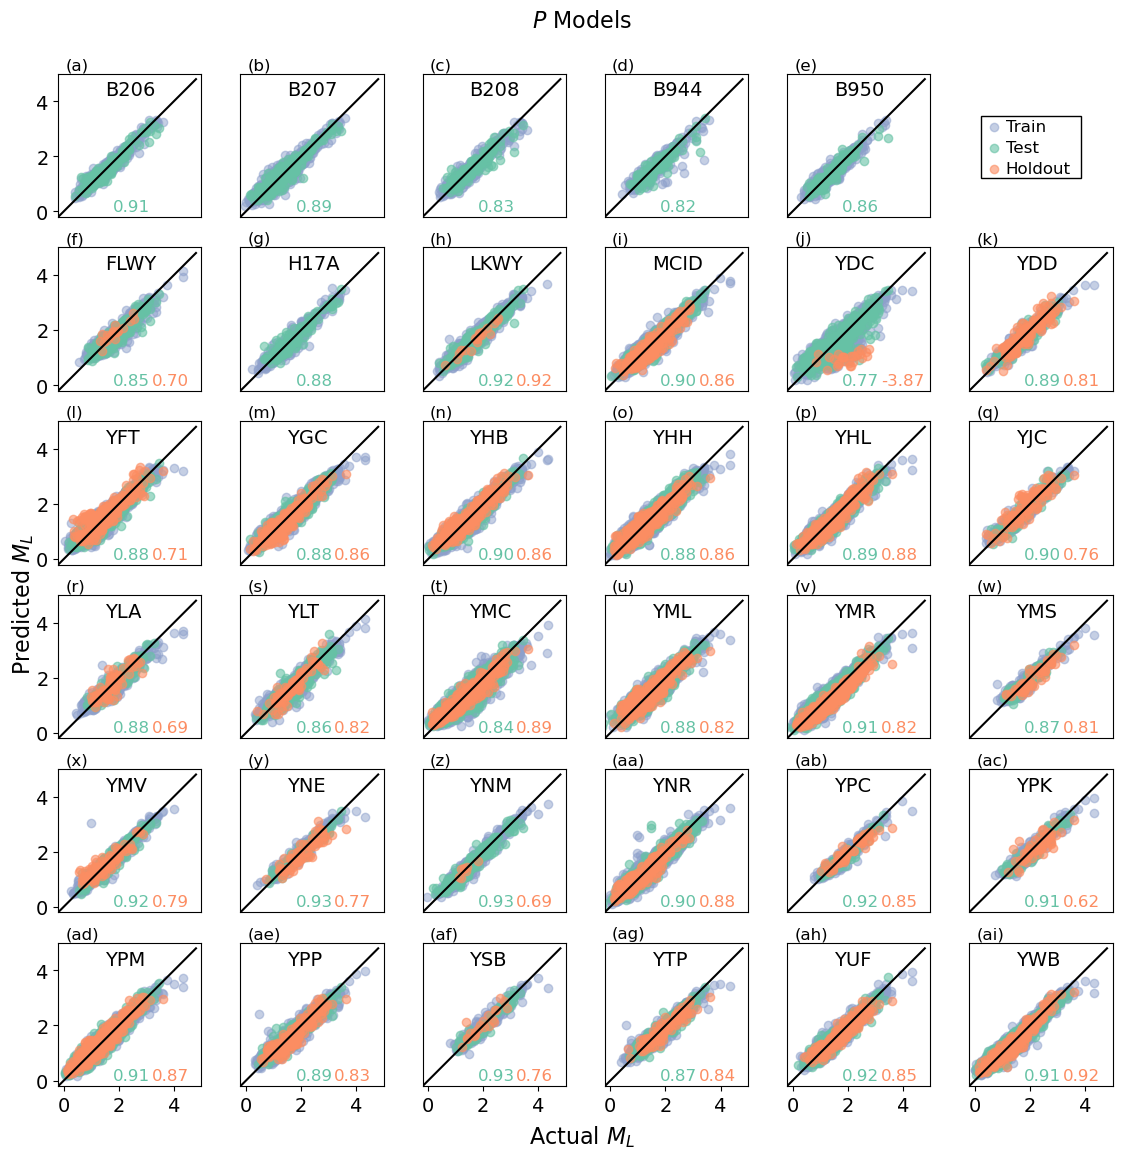

In [19]:
plotting.actual_v_predicted(results_df,
                     train_preds_df, 
                     test_preds_df,
                     holdout_preds_df,
                     inner_ticks_on=False,
                     title='$\it P$ Models',
                     colors=['#8da0cb', '#66c2a5', '#fc8d62'],
                     alphas=[0.5, 0.6, 0.6],
                     linestyle='-',
                     n_cols=6)

# Average the predictions

In [20]:
test_avg_df = compute_network_avg_prediction(test_preds_df)
holdout_avg_df = compute_network_avg_prediction(holdout_preds_df)

In [21]:
(test_avg_df['magnitude'] - test_avg_df['predicted_magnitude']).describe()

count    1498.000000
mean        0.000800
std         0.126941
min        -0.545393
25%        -0.073103
50%         0.006855
75%         0.080121
max         0.654066
dtype: float64

In [22]:
(holdout_avg_df['magnitude'] - holdout_avg_df['predicted_magnitude']).describe()

count    508.000000
mean      -0.001053
std        0.137333
min       -0.431439
25%       -0.082845
50%        0.005378
75%        0.085955
max        0.610962
dtype: float64

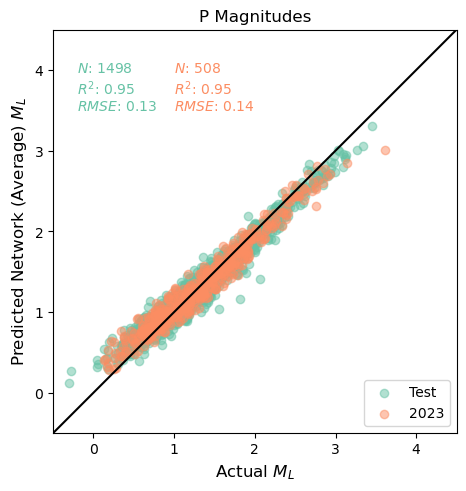

In [23]:
plotting.actual_v_network_avg_prediction([test_avg_df, holdout_avg_df],
                                    title='P Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2023'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

In [24]:
train_preds_df.iloc[train_preds_df['magnitude'].argmax()]

Evid                   60497322
magnitude              4.332082
predicted_magnitude    3.643983
station                     YHB
Name: 3146, dtype: object

In [25]:
holdout_preds_df.iloc[holdout_preds_df['magnitude'].argmax()]

Evid                   60535541
magnitude              3.615056
predicted_magnitude    2.947518
station                     YHH
Name: 92, dtype: object

In [26]:
test_preds_df.iloc[test_preds_df['magnitude'].argmax()]

Evid                   60071202
magnitude              3.446631
predicted_magnitude    3.669052
station                     YHB
Name: 229, dtype: object

# Average predictions when using all features

In [27]:
diff_df['train_r2'].describe()[['50%', 'std']]

50%    0.010000
std    0.018989
Name: train_r2, dtype: float64

In [28]:
diff_df['test_r2'].describe()[['50%', 'std']]

50%    0.008000
std    0.025264
Name: test_r2, dtype: float64

In [29]:
diff_df['holdout_r2'].describe()[['50%', 'std']]

50%    0.005000
std    0.080137
Name: holdout_r2, dtype: float64

In [30]:
results_allfeats_df['train_r2'].describe()[['min', 'max', '50%']]

min    0.794
max    0.951
50%    0.901
Name: train_r2, dtype: float64

In [31]:
results_allfeats_df['test_r2'].describe()[['min', 'max', '50%']]

min    0.758
max    0.939
50%    0.878
Name: test_r2, dtype: float64

In [32]:
results_allfeats_df['holdout_r2'].describe()[['min', 'max', '50%']]

min   -3.616
max    0.940
50%    0.830
Name: holdout_r2, dtype: float64

In [33]:
all_stats = results_df['station']
pred_path = os.path.join(datadir,'p_models', 'all_features')
train_preds_allfeat_df = combine_prediction_files(all_stats, pred_path,'P', 'train')
test_preds_allfeat_df = combine_prediction_files(all_stats, pred_path,'P', 'test')
holdout_preds_allfeat_df = combine_prediction_files(df_2023['station'].unique(), pred_path,'P', 'holdout')


In [34]:
(test_preds_allfeat_df['magnitude'] - test_preds_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.010043
std    0.205939
dtype: float64

In [35]:
(holdout_preds_allfeat_df['magnitude'] - holdout_preds_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.015674
std    0.250501
dtype: float64

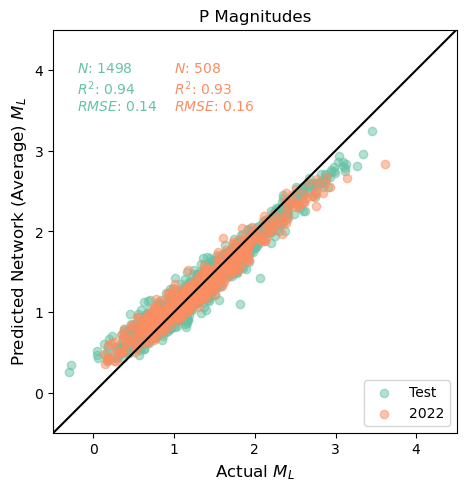

In [36]:
test_avg_allfeat_df = compute_network_avg_prediction(test_preds_allfeat_df)
holdout_avg_allfeat_df = compute_network_avg_prediction(holdout_preds_allfeat_df)
plotting.actual_v_network_avg_prediction([test_avg_allfeat_df, holdout_avg_allfeat_df],
                                    title='P Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

In [37]:
(test_avg_allfeat_df['magnitude'] - test_avg_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.004793
std    0.140425
dtype: float64

In [38]:
(holdout_avg_allfeat_df['magnitude'] - holdout_avg_allfeat_df['predicted_magnitude']).describe()[['50%', 'std']]

50%    0.011869
std    0.160374
dtype: float64

(-1.1, 1.1)

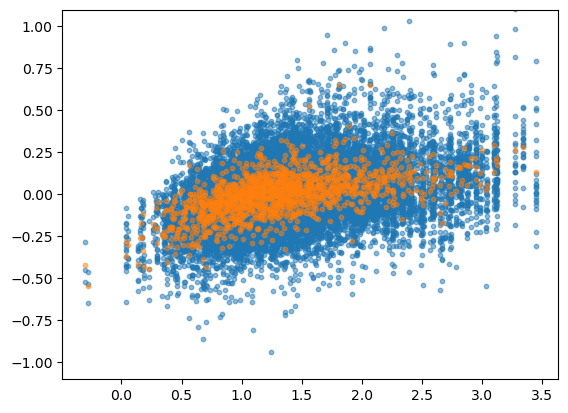

In [39]:
plt.scatter(test_preds_df['magnitude'], 
            test_preds_df['magnitude'] - test_preds_df['predicted_magnitude'],
            alpha=0.5,
            s=10)
plt.scatter(test_avg_df['magnitude'], 
            test_avg_df['magnitude'] - test_avg_df['predicted_magnitude'],
            alpha=0.5,
            s=10)
plt.ylim([-1.1, 1.1])

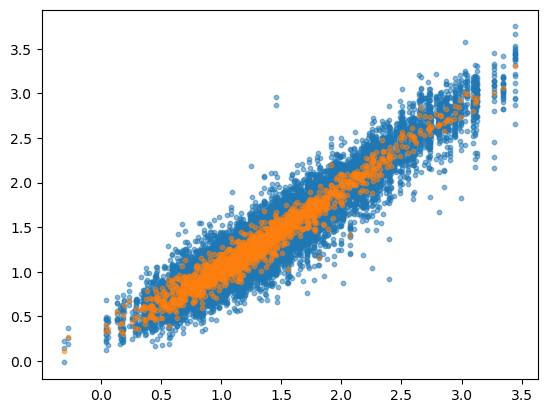

In [40]:
plt.scatter(test_preds_df['magnitude'], 
            test_preds_df['predicted_magnitude'],
            alpha=0.5,
            s=10)
plt.scatter(test_avg_df['magnitude'], 
            test_avg_df['predicted_magnitude'],
            alpha=0.5,
            s=10)